<a href="https://colab.research.google.com/github/mantashamqbl/Sentiment_Analysis/blob/main/Intensity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setting up the environment

In [2]:
from google.colab import drive
import os

# Mount Google Drive to the /content/drive directory
drive.mount('/content/drive')

# Create the directory if it doesn't exist (within Google Drive)
os.makedirs('/content/drive/MyDrive/Intensity_Analysis', exist_ok=True)

# Setting the working directory
os.chdir('/content/drive/MyDrive/Intensity_Analysis/Intensity_Data')

# Now any file operations will be relative to this directory
print("Current working directory:", os.getcwd())

Mounted at /content/drive
Current working directory: /content/drive/MyDrive/Intensity_Analysis/Intensity_Data


In [3]:
import os
print(os.listdir())

['glove.6B.100d.txt', 'glove.6B.200d.txt', 'glove.6B.50d.txt', 'glove.6B.300d.txt', 'sadness.csv', 'angriness.csv', ' angriness.txt', 'happiness.txt', 'glove.6B.zip', 'happiness.csv', 'combined_data.csv', 'Intensity_Analysis_lstm_model.h5', 'label_encoder.pkl', 'sample_data.csv', 'c2_sample_data.csv', 'sadness.txt', 'tokenizer.pkl']


In [4]:
!pip install tensorflow-text
#Importing essential libraries and functions
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 826.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


Loading dataset

In [7]:
#Importing dataset
import pandas as pd

# 1. Check if the file exists in the current working directory
import os
print(os.listdir())  # List files in the current directory to see if 'angriness.csv' is present
angriness_data = pd.read_csv('/content/drive/MyDrive/Intensity_Analysis/Intensity_Data/angriness.csv')
angriness_data.head()


['glove.6B.100d.txt', 'glove.6B.200d.txt', 'glove.6B.50d.txt', 'glove.6B.300d.txt', 'sadness.csv', 'angriness.csv', ' angriness.txt', 'happiness.txt', 'sadness.txt', 'sample_data.csv', 'glove.6B.zip', 'happiness.csv', 'combined_data.csv', 'cl_lstm_model_acc_0.0.h5', 'label_encoder.pkl', 'tokenizer.pkl', 'Intensity_Analysis_lstm_model.h5']


,content,intensity
0,"Sometimes I’m not angry, I’m hurt and there’s ...",angriness
1,Not available for busy people☺,angriness
2,I do not exist to impress the world. I exist t...,angriness
3,Everything is getting expensive except some pe...,angriness
4,My phone screen is brighter than my future 🙁,angriness


In [10]:
# 1. Check if the file exists in the current working directory
import os
print(os.listdir())  # List files in the current directory to see if 'happiness.csv' is present
happiness_data = pd.read_csv('/content/drive/MyDrive/Intensity_Analysis/Intensity_Data/happiness.csv')
happiness_data.head()


['glove.6B.100d.txt', 'glove.6B.200d.txt', 'glove.6B.50d.txt', 'glove.6B.300d.txt', 'sadness.csv', 'angriness.csv', ' angriness.txt', 'happiness.txt', 'sadness.txt', 'sample_data.csv', 'glove.6B.zip', 'happiness.csv', 'combined_data.csv', 'cl_lstm_model_acc_0.0.h5', 'label_encoder.pkl', 'tokenizer.pkl', 'Intensity_Analysis_lstm_model.h5']


,content,intensity
0,Wants to know how the hell I can remember word...,happiness
1,Love is a long sweet dream & marriage is an al...,happiness
2,The world could be amazing when you are slight...,happiness
3,My secret talent is getting tired without doin...,happiness
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",happiness


In [8]:

# 1. Check if the file exists in the current working directory
import os
print(os.listdir())  # List files in the current directory to see if 'sadness.csv' is present
sadness_data = pd.read_csv('/content/drive/MyDrive/Intensity_Analysis/Intensity_Data/sadness.csv')
sadness_data.head()


['glove.6B.100d.txt', 'glove.6B.200d.txt', 'glove.6B.50d.txt', 'glove.6B.300d.txt', 'sadness.csv', 'angriness.csv', ' angriness.txt', 'happiness.txt', 'sadness.txt', 'sample_data.csv', 'glove.6B.zip', 'happiness.csv', 'combined_data.csv', 'cl_lstm_model_acc_0.0.h5', 'label_encoder.pkl', 'tokenizer.pkl', 'Intensity_Analysis_lstm_model.h5']


,content,intensity
0,"Never hurt people who love you a lot, because ...",sadness
1,Don’t expect me to tell you what you did wrong...,sadness
2,I preferred walking away than fighting for you...,sadness
3,"Moving forward in life isn’t the hard part, it...",sadness
4,"Never cry for anyone in your life, because tho...",sadness


In [11]:
#adding labels
angriness_data['label'] = 'angry'
sadness_data['label'] = 'sad'
happiness_data['label'] = 'happy'


In [20]:
combined_data = pd.concat([angriness_data, sadness_data, happiness_data], ignore_index = True)
combined_data.head()


,content,intensity,label
0,"Sometimes I’m not angry, I’m hurt and there’s ...",angriness,angry
1,Not available for busy people☺,angriness,angry
2,I do not exist to impress the world. I exist t...,angriness,angry
3,Everything is getting expensive except some pe...,angriness,angry
4,My phone screen is brighter than my future 🙁,angriness,angry


In [21]:
# Save the combined data to a CSV file
combined_data.to_csv('/content/drive/MyDrive/Intensity_Analysis/Intensity_Data/combined_data.csv', index=False)

In [22]:
combined_data.tail()

,content,intensity,label
2034,"If I know what love is, it is because of you.",happiness,happy
2035,The spaces between your fingers are meant to b...,happiness,happy
2036,In you i H've Found the love of my life and my...,happiness,happy
2037,The magic of first love is our ignorance that ...,happiness,happy
2038,Love can't be found Where it doesn't exist ..,happiness,happy


In [23]:
combined_data.shape

(2039, 3)

In [24]:
combined_data.describe()


,content,intensity,label
count,2039,2039,2039
unique,1586,3,3
top,"['You Hurt Me But I Still Love You.', 'True Lo...",happiness,happy
freq,134,708,708


In [25]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    2039 non-null   object
 1   intensity  2039 non-null   object
 2   label      2039 non-null   object
dtypes: object(3)
memory usage: 47.9+ KB


In [26]:
print(len(combined_data))
combined_data['intensity'].value_counts()

2039


,count
intensity,
happiness,708
angriness,696
sadness,635


In [27]:
# checking for missing values
combined_data.isnull().values.any()

False

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

In [28]:
combined_data = combined_data.drop_duplicates()


In [29]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1592 entries, 0 to 2038
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    1592 non-null   object
 1   intensity  1592 non-null   object
 2   label      1592 non-null   object
dtypes: object(3)
memory usage: 49.8+ KB


<ipython-input-30-6882e291e21c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='intensity', data=combined_data, palette='hls')


<Axes: xlabel='intensity', ylabel='count'>

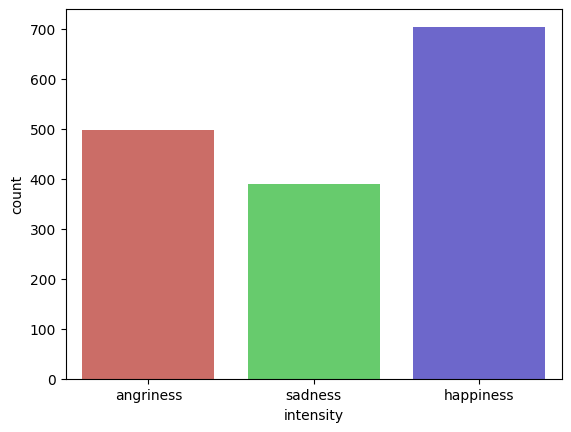

In [30]:
#lets observe different intensity in dataset.
import seaborn as sns
sns.countplot(x='intensity', data=combined_data, palette='hls')


Data Preprocessing

In [31]:
combined_data["content"]

,content
0,"Sometimes I’m not angry, I’m hurt and there’s ..."
1,Not available for busy people☺
2,I do not exist to impress the world. I exist t...
3,Everything is getting expensive except some pe...
4,My phone screen is brighter than my future 🙁
...,...
2034,"If I know what love is, it is because of you."
2035,The spaces between your fingers are meant to b...
2036,In you i H've Found the love of my life and my...
2037,The magic of first love is our ignorance that ...


In [32]:
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)


In [33]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    # Check if the input is a string before processing
    if isinstance(text, str):
        return TAG_RE.sub('', text)
    else:
        # Handle non-string inputs (e.g., NaN)
        return ''  # Or any appropriate value

def preprocessing_txt(sen):
    # Convert sen to string before any operations
    sen = str(sen)
    sentence = remove_tags(sen) #remove tags
    sentence = re.sub('[^a-zA-Z]', ' ', sentence) #remove punctuations and numbers
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) #single character removal
    sentence = re.sub(r'\s+', ' ', sentence) #remove multiple spaces
    sentence = sen.lower() #lowercasing
    sentence = sentence.split()
    stop_words = set(stopwords.words('english')) #remove stopwords
    sentence = [word for word in sentence if word not in stop_words]
    sentence = ' '.join(sentence)
    return sentence

def preprocess_and_chunk(data, chunk_size=100):  # Adjust chunk_size as needed
    """Preprocesses the data in chunks to avoid KeyboardInterrupt."""
    all_processed = []
    for i in range(0, len(data), chunk_size):
        chunk = data[i:i + chunk_size]
        processed_chunk = [preprocessing_txt(sen) for sen in chunk]
        all_processed.extend(processed_chunk)
    return all_processed

#calling preprocessing function on content in chunks
x = preprocess_and_chunk(combined_data["content"].tolist())
print(x)

['sometimes i’m angry, i’m hurt there’s big difference.', 'available busy people☺', 'exist impress world. exist live life way make happy.', 'everything getting expensive except people, getting cheaper.', 'phone screen brighter future 🙁', 'anger feeling makes mouth work faster mind..', 'man, man, man, good man, way man, man, keep man, man, idiot man, busy man, man, 30 man, seconds man! read without man', 'sometimes best way get someone\\’s attention stop giving yours.', 'people like bring past, present future look better theirs.', 'wakeup>job>noluv>daaru>sleep>repeat..', 'u haters!!! thanks making famous. don’t give sh***t u talk behind back.', 'hurts worst person made feel special yesterday makes feel unwanted today.', 'life short don’t waste reading whatsapp status', 'treated way treat me, would hate guts.', 'girls r like potato chips…you can’t 1', 'asked life would sacrificed smile… you’ve stripped pride', 'people always miss find much happier without them.', 'people change one two r

In [35]:
# Ensure X and y have the same length after preprocessing
# combined_data['content'] = x  # Add processed content to DataFrame

# Create a new DataFrame with the processed content
processed_data = pd.DataFrame({'content': x})

# Concatenate the new DataFrame with the relevant columns from combined_data
combined_data = pd.concat([processed_data, combined_data[['intensity', 'label']]], axis=1)

# Now you can continue with the rest of your code
# Reset index before dropping duplicates to avoid index mismatch
combined_data.reset_index(drop=True, inplace=True)

# Drop duplicates based on processed content
combined_data.drop_duplicates(subset=['content'], inplace=True)

# Update labels to match the updated DataFrame after duplicate removal
labels = combined_data['label'].map({'angry': 0, 'happy': 1, 'sad': 2}).values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(combined_data['label'])  # This will convert labels to numeric values


#splitting the dataframe into features(X) and labels(y)
X = combined_data['content'].tolist() # Use updated 'processed_content'
y = labels  # Use updated labels
print ('Features:', X[5:])
print ('Labels:', y[:])

Features: ['anger feeling makes mouth work faster mind..', 'man, man, man, good man, way man, man, keep man, man, idiot man, busy man, man, 30 man, seconds man! read without man', 'sometimes best way get someone\\’s attention stop giving yours.', 'people like bring past, present future look better theirs.', 'wakeup>job>noluv>daaru>sleep>repeat..', 'u haters!!! thanks making famous. don’t give sh***t u talk behind back.', 'hurts worst person made feel special yesterday makes feel unwanted today.', 'life short don’t waste reading whatsapp status', 'treated way treat me, would hate guts.', 'girls r like potato chips…you can’t 1', 'asked life would sacrificed smile… you’ve stripped pride', 'people always miss find much happier without them.', 'people change one two reasons: learned lot, hurt many times.', 'fail feels shame steps away success ☺', 'get betrayed people never thought of…', 'ass ever get jealous shit comes ur mouth?', 'give lots importance someone, loss importance life….', 'sol

In [36]:
from sklearn.model_selection import train_test_split
#train set will be used to train our deep learning models.
#while test will be used to evaluate how well our model performs.
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

Preparing embedding layer

In [37]:
#embedding layers expects words to be in numeric form.
#using tokenizer function from keras.preprocessing.text library
#method fit_on_text trains the tokenizer
#method texts_to_sequences converts sentences to numeric form
!pip install keras
!pip install tensorflow-text
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenization and padding
word_tokenizer = Tokenizer()

# Convert all elements of X_train to strings before fitting the tokenizer
X_train = [str(item) for item in X_train]

word_tokenizer.fit_on_texts(X_train)
X_train = word_tokenizer.texts_to_sequences(X_train) # Changed tokenizer to word_tokenizer
X_test = word_tokenizer.texts_to_sequences(X_test)  # Changed tokenizer to word_tokenizer

#adding 1 to store the dimensions for words for which no pretrained word embeddings exists
vocab_size = len(word_tokenizer.word_index) + 1 # Changed tokenizer to word_tokenizer
print("vocab_size:", vocab_size)

vocab_size: 2364


In [38]:
#padding all content to fixed length
max_length = 100
X_train = pad_sequences(X_train, padding='post', maxlen=max_length)
X_test = pad_sequences(X_test, padding='post', maxlen=max_length)

In [39]:
 # Define the path to the GloVe file
 glove_path = '/content/drive/MyDrive/Intensity_Analysis/Intensity_Data/glove.6B.100d.txt'
#load GloVe word embeddings and create an embeddings dictionay
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/Intensity_Analysis/Intensity_Data/glove.6B.100d.txt', encoding='utf8')
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [40]:
#create embedding matrix having 100 columns
#containing 100 dimensional GloVe word embeddings for all words in our corpus
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer here
embedding_matrix = zeros((2364, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix.shape

(2364, 100)

Model Training with Recurrent Neural Network (LSTM)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Assuming the maximum sequence length used for padding
max_length = 100

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=2364, output_dim=100, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for emotions

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │         236,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 236,400 (923.44 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 236,400 (923.44 KB)

In [57]:
# Train the model
model_history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2, verbose=2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {accuracy:.2f}")

Epoch 1/10
31/31 - 5s - 146ms/step - accuracy: 0.2996 - loss: nan - val_accuracy: 0.2702 - val_loss: nan
Epoch 2/10
31/31 - 6s - 191ms/step - accuracy: 0.2996 - loss: nan - val_accuracy: 0.2702 - val_loss: nan
Epoch 3/10
31/31 - 11s - 352ms/step - accuracy: 0.2996 - loss: nan - val_accuracy: 0.2702 - val_loss: nan
Epoch 4/10
31/31 - 9s - 279ms/step - accuracy: 0.2996 - loss: nan - val_accuracy: 0.2702 - val_loss: nan
Epoch 5/10
31/31 - 7s - 228ms/step - accuracy: 0.2996 - loss: nan - val_accuracy: 0.2702 - val_loss: nan
Epoch 6/10
31/31 - 10s - 336ms/step - accuracy: 0.2996 - loss: nan - val_accuracy: 0.2702 - val_loss: nan
Epoch 7/10
31/31 - 9s - 306ms/step - accuracy: 0.2996 - loss: nan - val_accuracy: 0.2702 - val_loss: nan
Epoch 8/10
31/31 - 9s - 295ms/step - accuracy: 0.2996 - loss: nan - val_accuracy: 0.2702 - val_loss: nan
Epoch 9/10
31/31 - 5s - 154ms/step - accuracy: 0.2996 - loss: nan - val_accuracy: 0.2702 - val_loss: nan
Epoch 10/10
31/31 - 7s - 231ms/step - accuracy: 0.299

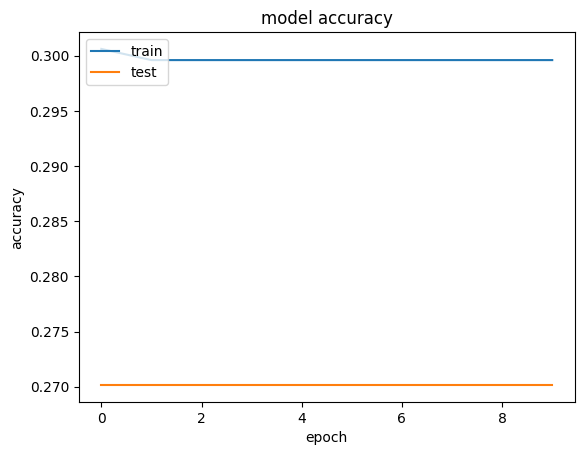

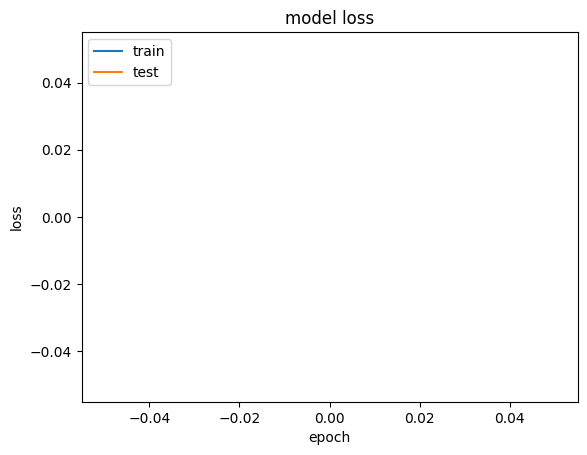

In [43]:
#Model performance charts

import matplotlib.pyplot as plt

# Access accuracy using 'accuracy' instead of 'acc'
plt.plot(lstm_model_history.history['accuracy'])
plt.plot(lstm_model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Make Predictions on live on Sentiment intensity Analysis Data


In [44]:
#list files in working directory
!ls


 angriness.csv		    glove.6B.200d.txt   happiness.txt			   sample_data.csv
' angriness.txt'	    glove.6B.300d.txt   Intensity_Analysis_lstm_model.h5   tokenizer.pkl
 cl_lstm_model_acc_0.0.h5   glove.6B.50d.txt    label_encoder.pkl
 combined_data.csv	    glove.6B.zip        sadness.csv
 glove.6B.100d.txt	    happiness.csv       sadness.txt


In [45]:
# Save the trained model
model.save("Intensity_Analysis_lstm_model.h5")

# Save the tokenizer
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(word_tokenizer, f)

# Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)


In [46]:
#Loading new sample data
sample_data = pd.read_csv('/content/drive/MyDrive/Intensity_Analysis/Intensity_Data/sample_data.csv')
sample_data.head()

,content,intensity,label
0,I love this sunny day!,happiness,happy
1,This traffic jam is driving me crazy!,angriness,angry
2,I am feeling really down today.,sadness,sad
3,"Wow, I just got a promotion at work!",happiness,happy
4,I can't believe how rude that person was.,angriness,angry


In [51]:
# Check the actual column names in your DataFrame
print(sample_data.columns)

# Assuming your content column is named 'text' (adjust accordingly)
unseen_data = sample_data

unseen_processed = []
for content in unseen_data:
  content= preprocessing_txt(content) # Assuming preprocessing_txt is defined elsewhere
  unseen_processed.append(content)

Index(['content ', 'intensity', 'label'], dtype='object')


In [53]:
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = word_tokenizer.texts_to_sequences(unseen_processed)

# Pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=max_length)

In [56]:
# Passing tokenised instance to the LSTM model for predictions
unseen_intensity = model.predict(unseen_padded)

unseen_intensity

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32)

In [75]:
# Writing model output file back to Google Drive

# Assuming unseen_intensity has shape (num_samples, num_classes)
# and you want to extract the predicted class index

# Get the predicted class index (argmax) for each sample
predicted_class_indices = np.argmax(unseen_intensity, axis=1)

# Map class indices back to original labels (if necessary)
# If label_encoder was used during training, use it to inverse transform:
predicted_labels = label_encoder.inverse_transform(predicted_class_indices)

# Create a DataFrame with predicted intensities
df_predicted_intensity = pd.DataFrame({'Predicted intensity': predicted_labels})


# Instead of using sample_data['content'], access the original unseen_processed list
df_content = pd.DataFrame({'content': unseen_processed})

# Assuming 'intensity' and 'label' are columns in your original sample_data
df_intensity = pd.DataFrame(sample_data['intensity'], columns=['intensity'])
df_label = pd.DataFrame(sample_data['label'], columns=['label'])

# Concatenate dataframes
dfx = pd.concat([df_content, df_intensity, df_label, df_predicted_intensity], axis=1)
# Writing model output file back to Google Drive

# Assuming unseen_intensity has shape (num_samples, num_classes)
# and you want to extract the predicted class index

# Get the predicted class index (argmax) for each sample
predicted_class_indices = np.argmax(unseen_intensity, axis=1)

# Map class indices back to original labels (if necessary)
# If label_encoder was used during training, use it to inverse transform:
predicted_labels = label_encoder.inverse_transform(predicted_class_indices)

# Create a DataFrame with predicted intensities
df_predicted_intensity = pd.DataFrame({'Predicted intensity': predicted_labels})


# Instead of using sample_data['content'], access the original unseen_processed list
df_content = pd.DataFrame({'content': unseen_processed})

# Assuming 'intensity' and 'label' are columns in your original sample_data
df_intensity = pd.DataFrame(sample_data['intensity'], columns=['intensity'])
df_label = pd.DataFrame(sample_data['label'], columns=['label'])

# Concatenate dataframes
dfx = pd.concat([df_content, df_intensity, df_label, df_predicted_intensity], axis=1)

# Save to CSV
dfx.to_csv('/content/drive/MyDrive/c2_sample_data.csv', sep=',', encoding='UTF-8')

dfx.head(6)

,content,intensity,label,Predicted intensity
0,content,happiness,happy,angry
1,intensity,angriness,angry,angry
2,label,sadness,sad,angry
3,NaN,happiness,happy,NaN
4,NaN,angriness,angry,NaN
5,NaN,sadness,sad,NaN


**Deployment**

In [6]:
import joblib
from tensorflow.keras.models import load_model  # Add this line to load the saved model

# Load the trained model (replace 'Intensity_Analysis_lstm_model.h5' with the actual model file name)
model = load_model('Intensity_Analysis_lstm_model.h5')

joblib.dump(model, 'Intensity_Analysis.pkl')


['Intensity_Analysis.pkl']

In [7]:
!pip install Flask pyngrok


In [11]:
!pip install Flask pyngrok

from flask import Flask, request, jsonify
import joblib
import numpy as np
from pyngrok import ngrok

# Load the model, using the correct filename 'Intensity_Analysis.pkl'
model = joblib.load('Intensity_Analysis.pkl')

# Create Flask app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    # Assuming input is a list of features
    features = np.array(data['features']).reshape(1, -1)
    prediction = model.predict(features)
    return jsonify({'prediction': prediction.tolist()})

# Get your authtoken from https://dashboard.ngrok.com/auth
# and set it as an environment variable
!ngrok authtoken your_actual_authtoken # Replace <your_authtoken> with your actual authtoken

# Create a public URL using ngrok
public_url = ngrok.connect(port='5000')
print(f"Public URL: {public_url}")

if __name__ == '__main__':
    app.run(port=5000)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


ERROR:pyngrok.process.ngrok:t=2024-12-18T19:56:08+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: your_actual_authtoken\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: The authtoken you specified does not look like a proper ngrok tunnel authtoken.\nYour authtoken: your_actual_authtoken\nInstructions to install your authtoken are on your ngrok dashboard:\nhttps://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_105\r\n.

In [12]:
!python app.py


2024-12-18 19:56:35.467616: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734551795.523188   20230 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734551795.542868   20230 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "/content/drive/MyDrive/Intensity_Analysis/Intensity_Data/app.py", line 21, in <module>
    model = joblib.load('Intensity_Analysis.pkl')
NameError: name 'joblib' is not defined


In [14]:
import requests

# Add 'https://' to the URL
url = 'https://your_ngrok_public_url/predict'  # Replace with the actual ngrok URL
data = {
    'features': [1.0, 2.0, 3.0]  # Replace with the appropriate features
}

response = requests.post(url, json=data)
print(response.json())

ConnectionError: HTTPSConnectionPool(host='your_ngrok_public_url', port=443): Max retries exceeded with url: /predict (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x79a4c2f88820>: Failed to resolve 'your_ngrok_public_url' ([Errno -2] Name or service not known)"))